# Predicting the Popularity of Online News

### Downloading and import the needed libraries<a name="subparagraph1"></a>
(This part was finalized after the completion of the whole analysis.)

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

import seaborn as sns

### Downloading the data <a name="subparagraph2"></a>

In [2]:
input_file =  ".\OnlineNewsPopularityDataset.csv"
df = pd.read_csv(input_file, header = 0)

df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Checking the shape of the dataframe; number of rows and columns.

In [3]:
df.shape

(39644, 61)

Checking the types of data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null int64
 n_tokens_title                   39644 non-null int64
 n_tokens_content                 39644 non-null int64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null int64
 num_self_hrefs                   39644 non-null int64
 num_imgs                         39644 non-null int64
 num_videos                       39644 non-null int64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null int64
 data_channel_is_lifestyle        39644 non-null int64
 data_channel_is_entertainment    39644 non-null int64
 data_channel_is_bus              39644 non-null int64
 d

A statistical summary of the numerical attributes.

In [5]:
df.describe() 

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### Data in Histograms<a name="subparagraph3"></a>
Let's take a look at the data in histograms.There was quite a lot of categorical variables in the data, represented here by the single high bars in many of the charts. 

<function matplotlib.pyplot.show(*args, **kw)>

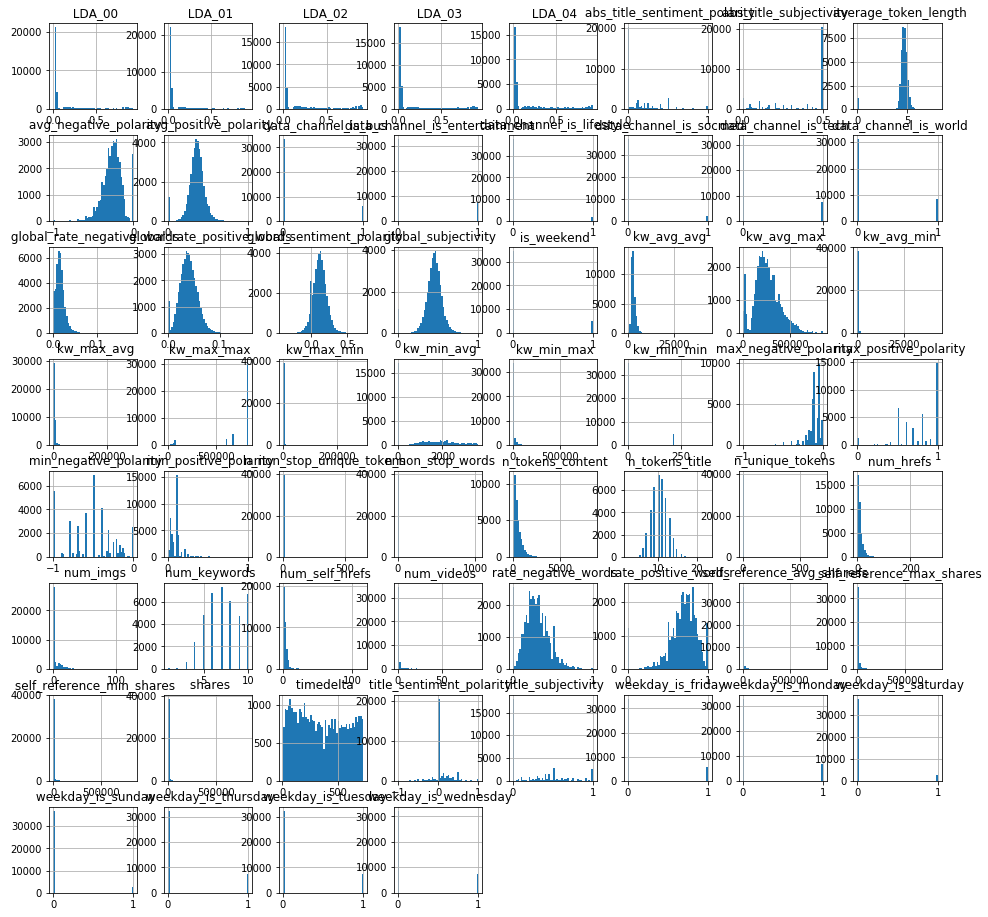

In [6]:
df.hist(bins=50, figsize= (16,16))
plt.show

## Linear Regression<a name="fixingoutliers"></a>

## 2. Fixing outliers<a name="fixingoutliers"></a>

### Spotting and removing outliers<a name="subparagraph4"></a>
Plotting the 'shares' label in a histogram makes it clear that outliers are present! Anything beyond c.3000 shares is not even visible! Let's remove them before moving further

In [8]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

C:\Users\huytr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


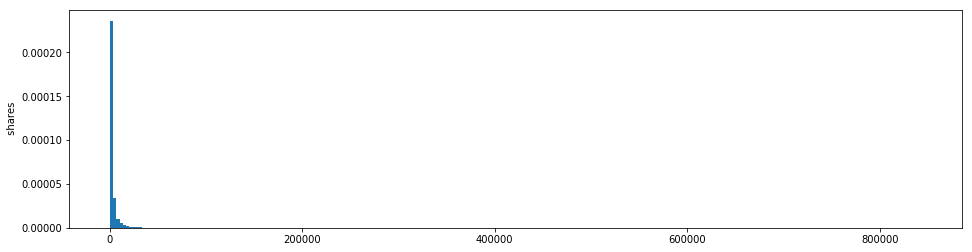

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

x = df[' shares']
plt.hist(x, normed=True, bins=250)
plt.ylabel(' shares');

We remove the outliers using a function, which leaves out the 'shares' where the value is larger than its mean +/- two standard deviations.

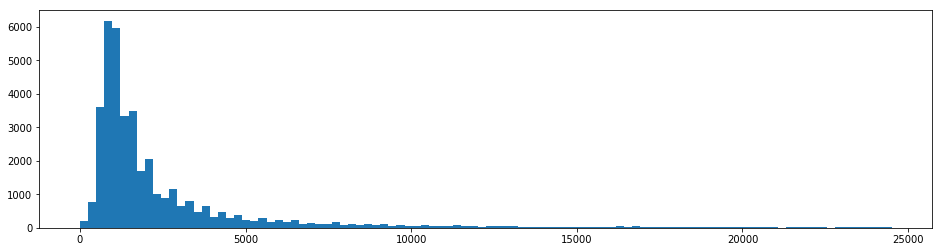

(39053, 1)

In [12]:
def reject_outliers(shares):
    u = np.median(df[' shares'])
    s = np.std(df[' shares'])
    filtered= [e for e in (df[' shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

df_shares = pd.DataFrame(filtered)
df_shares.shape


The number of rows in the original dataframe was 39644. Using the function above we spotted and removed 591 outliers altogether, c. 1.5% of the rows.

### Creating a new data set without outliers <a name="subparagraph5"></a>
Let's create a new dataframe - df2 - where outliers are rejected. We define an outlier as a value of 'shares' which is outside two standard deviations (= 3395 + (2 x 11627) = 26649) of the median for 'shares (3395.38). For this we use Pandas' **Conditional Selection**. <br> 
We obviously consider only the upper bound, which is a positive number. The mean minus two standard deviations would result in a negative number, and it's not possible to have a negative number of 'shares'.<br><br>
Checking the shape of the new dataframe; number of rows and columns.

In [13]:
df2 = df[df[' shares']<26647]
df2.shape

(39130, 61)

The new dataframe df2 has c. 500 rows less than the original with the highest value for 'shares' being c. 26650. <br>
There is a slight difference in how many outliers the function *def reject_outliers(shares)* above removes (=591) and how many are removed by the Conditional Selection (=514). This is probably due to rounding errors in the calculation of the mean and standard deviation, since 'shares' above 1000 are rounded to the nearest hundred. 

## 3. Correlations in data - numerically and graphically<a name="correlations"></a>

Next a look at the variables' correlations, numerically and graphically.

In [16]:
corrmat = df2.corr()
corrmat[' shares'].sort_values(ascending=False)

 shares                           1.000000
 kw_avg_avg                       0.184027
 LDA_03                           0.122997
 kw_max_avg                       0.096294
 kw_min_avg                       0.081258
 num_hrefs                        0.076651
 num_imgs                         0.073403
 self_reference_avg_sharess       0.067889
 is_weekend                       0.067792
 self_reference_min_shares        0.060230
 self_reference_max_shares        0.055830
 kw_avg_max                       0.052563
 global_subjectivity              0.052508
 abs_title_sentiment_polarity     0.052128
 weekday_is_sunday                0.049506
 title_subjectivity               0.048917
 data_channel_is_socmed           0.047302
 num_keywords                     0.044302
 weekday_is_saturday              0.042820
 title_sentiment_polarity         0.037470
 num_videos                       0.036995
 kw_avg_min                       0.036717
 kw_max_min                       0.033022
 data_chann

Correlations between the variables and the label 'shares' are throughout rather low. This is presented also by the very light colours throughout the matrix below.

### Correlation matrix<a name="subparagraph6"></a>

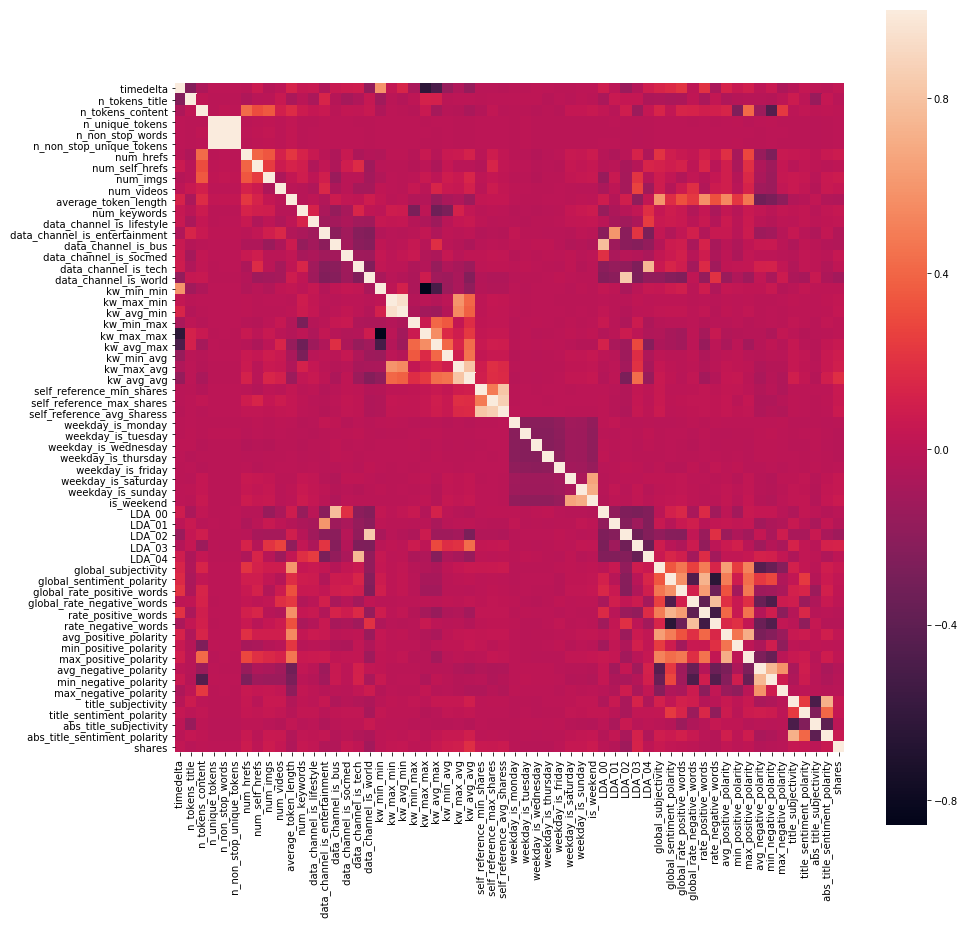

In [15]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

the Top 15 of most correlated features' and their types:
- kw_avg_avg - NUMERICAL
- LDA_03 - NUMERICAL
- kw_max_avg - NUMERICAL
- kw_min_avg - NUMERICAL
- num_hrefs - NUMERICAL
- num_imgs - NUMERICAL
- self_reference_avg_sharess - NUMERICAL
- is_weekend - CATEGORICAL
- self_reference_min_shares - NUMERICAL
- self_reference_max_shares - NUMERICAL
- kw_avg_max - NUMERICAL
- global_subjectivity - NUMERICAL
- abs_title_sentiment_polarity - CATEGORICAL
- weekday_is_sunday - CATEGORICAL
- title_subjectivity - CATEGORICAL

Let's view them in  scatter matrices, in three separate ones for clarity's sake.

### Scatter matrices - 15 most correlated features<a name="subparagraph7"></a>

In [19]:
df2.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

C:\Users\huytr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


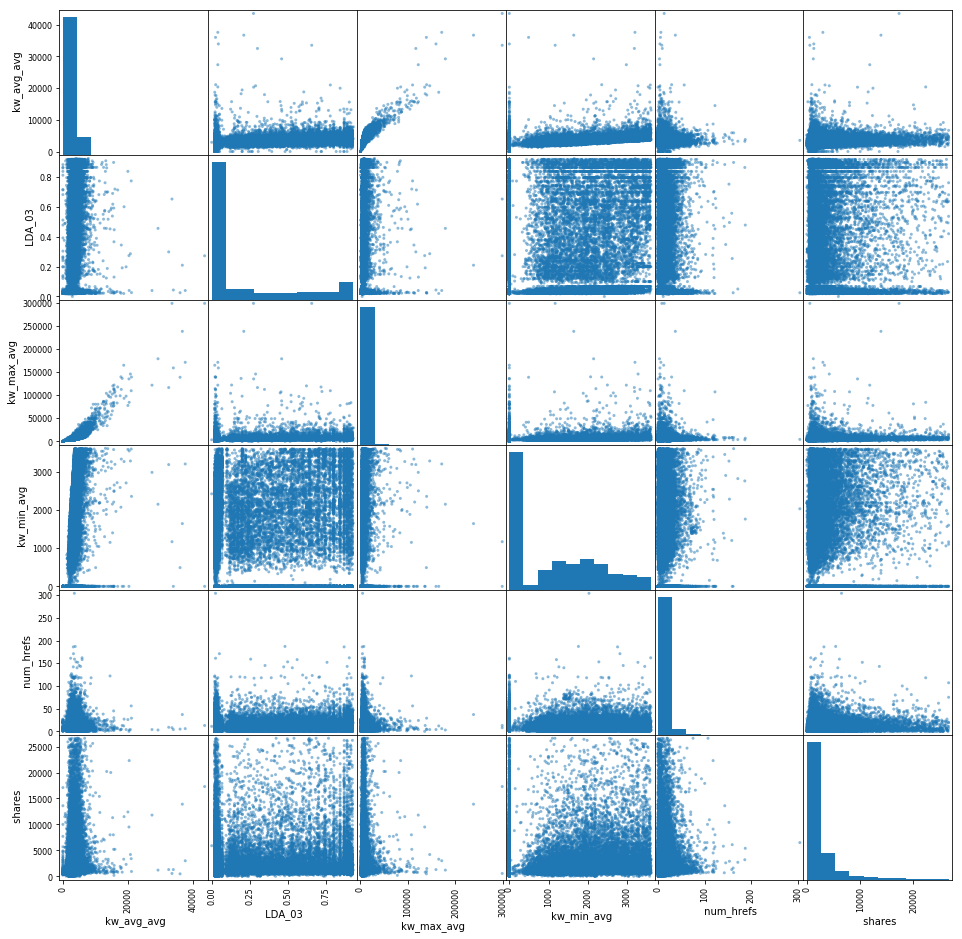

In [20]:
attributes = [' kw_avg_avg',' LDA_03',' kw_max_avg',' kw_min_avg',' num_hrefs',' shares']
scatter_matrix(df2[attributes], figsize=(16, 16));  

C:\Users\huytr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


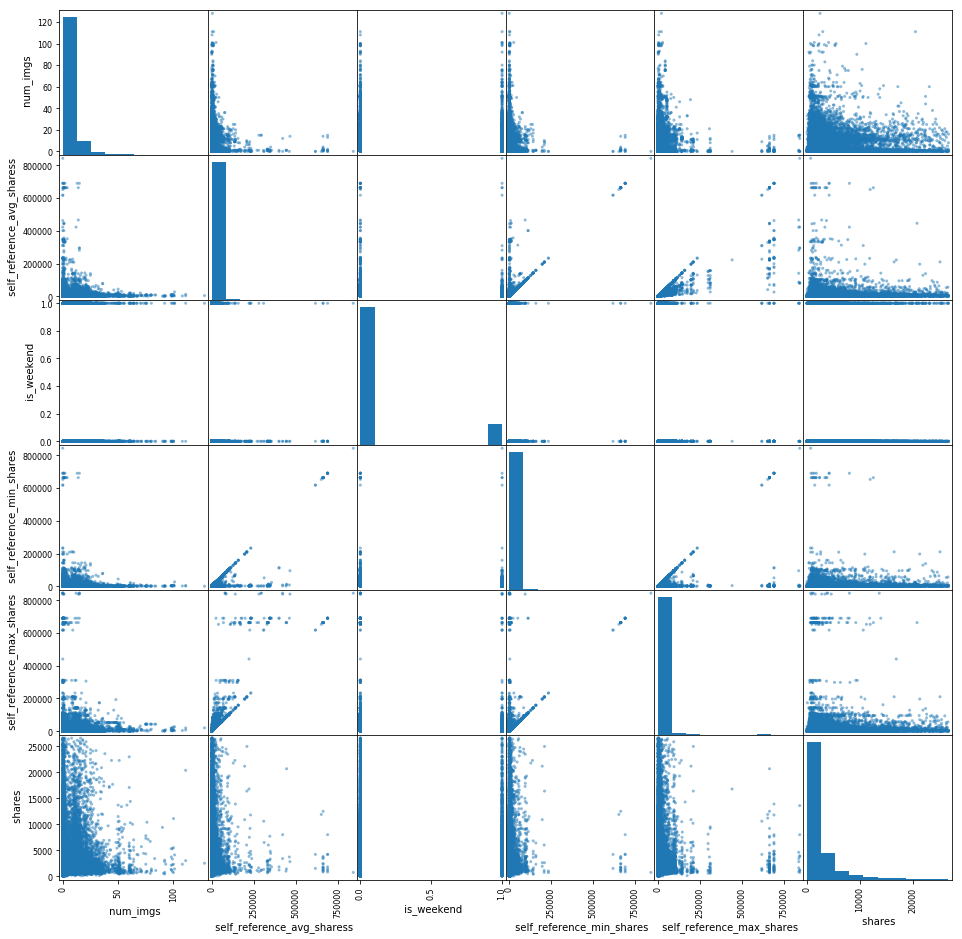

In [23]:
attributes = [' num_imgs',' self_reference_avg_sharess',' is_weekend',' self_reference_min_shares',' self_reference_max_shares',' shares']
scatter_matrix(df2[attributes], figsize=(16, 16));

C:\Users\huytr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


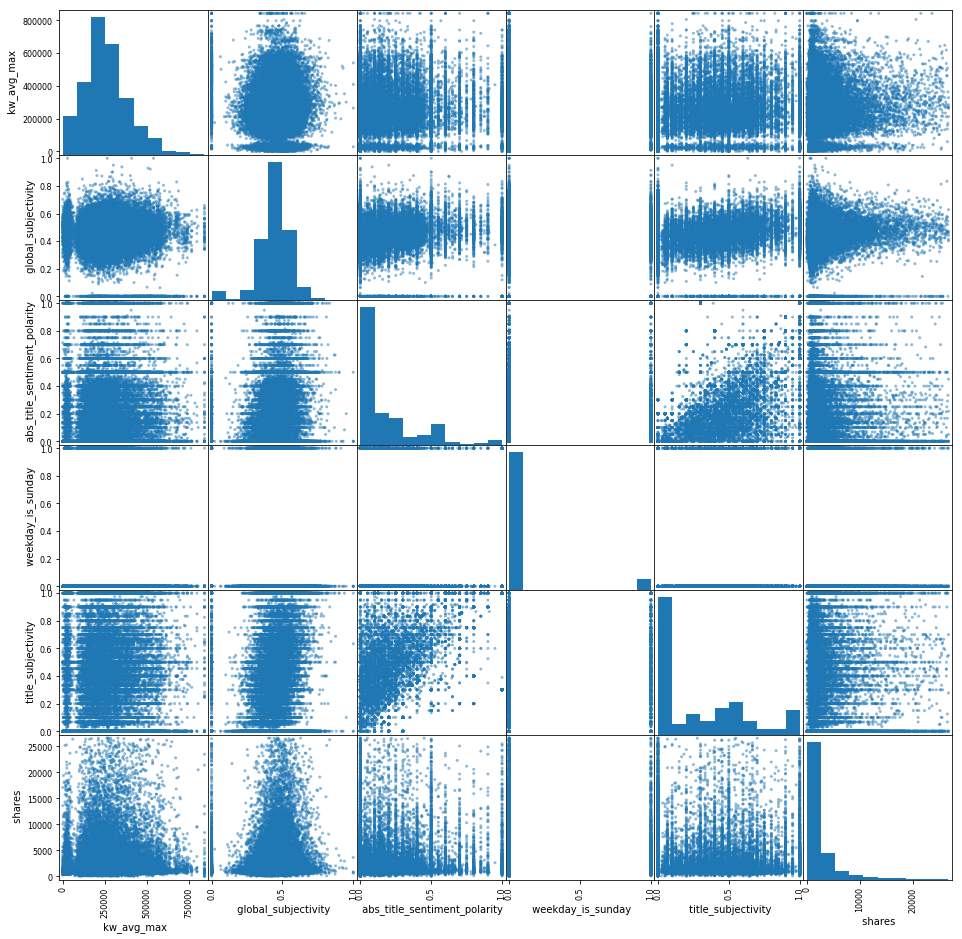

In [24]:
attributes = [' kw_avg_max',' global_subjectivity',' abs_title_sentiment_polarity',' weekday_is_sunday',' title_subjectivity',' shares']
scatter_matrix(df2[attributes], figsize=(16,16));

## 4. Sampling?<a name="stratsamp"></a>
We have now looked at the data both numerically in a correlation matrix and visually in scatter matrices. It's apparent that no single attribute is clearly more important than the others. The attribute **'kw_avg_avg'** has the highest correlation with **'shares'**, and it's still only barely 0.18. This would mean *stratified sampling* is not really needed. In Stratified Sampling we would divide the data into homogenous subgroups called *strata* then a number of instances would be sampled from each *stratum* to guarantee that the test set is representative of the overall data. Without any single attribute standing out as significant even with purely random sampling the risk for a skewed test set is insiginificant, hence, no need for *stratified sampling*.  

## 5. Train Test split <a name="traintest"></a>
Now we need to split our data to a train set (80%) and test set (20%).  The variable we're trying to predict is **'shares**; what determines the probability that a reader will share an online news article. <br>
The **random_state** of the split is set to a fixed number, here the commonly used '42', thereby keeping the random number generator constant. This way we avoid the risk of introducing sampling bias by always getting the same split.

In [27]:
train_set, test_set = train_test_split(df2, test_size=0.20, random_state=42)

# remove 'shares' - the predicted variable and 'url' - a text variable
X_train_set = train_set.drop(['url',' shares'], axis=1) 
y_train_set = train_set[' shares']

X_test_set = test_set.drop(['url',' shares'], axis=1)
y_test_set = test_set[' shares']

We now have a 80% Train set with 31304 rows and 20% Test set with  7826 rows!!!<br>
Let's introduce the Linear Regression model and try it out with a few instances from the training set.

## 6. Linear Regression<a name="linreg"></a>

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,1600,2242.968689
1,1100,1815.356230
2,904,2756.112092
3,2500,1944.872575
4,981,1767.350323


We now have a working Linear Regression model which we can test using a sample, here 500, from the Training set. The first 5 rows in the dataframe do not look too encouraging prediction wise. But the scatter plot below does present a slight pattern. Let's also measure the model's RMSE and MAE on the whole Training set.

C:\Users\huytr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


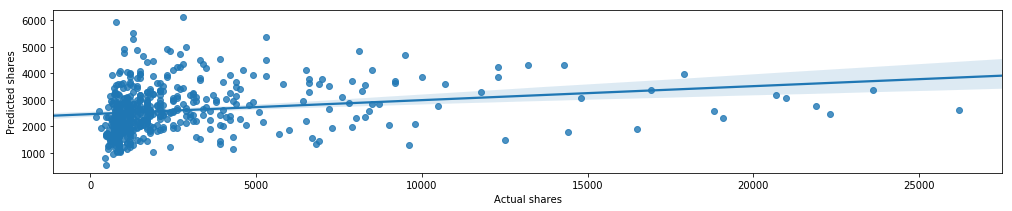

In [38]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual shares"], y=df_someXdata_LR["Predicted shares"])
# sns.plt.show()

### Linear Regression -  RMSE and MAE for the Training set <a name="subparagraph8"></a>

In [31]:
share_predictions = lin_reg.predict(X_train_set)
lin_mse = mean_squared_error(y_train_set, share_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

3272.521190486728

In [33]:
df[' shares'].median() #with outliers: 1400

1400.0

The median is 1400.  The model with its RMSE around 3300 is clearly *underfitting* the training data. This can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.<BR>
The main ways to fix the model in this case are to 
- select a more powerful model
- feed the training algorithm with better features<br><br>
Let's check also the Mean Absolute Error - MAE

In [34]:
lin_mae = mean_absolute_error(y_train_set, share_predictions)
print(lin_mae) 

1902.5806130104006


In [36]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Cross Validation - Linear Regression<a name="subparagraph11"></a>
Let's compute the same scores for the **Linear Regression** model as well, just to be sure:

In [37]:
lin_scores = cross_val_score(lin_reg, X_train_set, y_train_set,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores) #with outliers:mean 13185 std 7605

Scores: [3.28657786e+03 3.31672165e+03 3.30074939e+03 3.39138239e+03
 3.35556725e+03 3.21619285e+03 1.52685087e+08 3.22406327e+03
 3.22074112e+03 2.97523405e+03]
Mean: 15271437.376044175
Standard deviation: 45804549.71831131


After Cross Validation also Linear Regression looks worse.

### MSE, MAPE <a name="subparagraph12"></a>

In [44]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true, y_pred)


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
mse = mean_squared_error(y_train_set, share_predictions)
print(mse)

10709394.94218467


In [45]:
mape = mean_absolute_percentage_error(y_train_set, share_predictions)

print(mape)

ValueError: Expected 2D array, got 1D array instead:
array=[1600 1100  904 ...  511 4600 4000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 10. Summarizing RMSE, MAE, MAPE, MPE and MSE - pre-Cross Validation<a name="summarize"></a>
The results are<br><br>
**Linear regression**  
RMSE : 3272 , MAE : 835

## 11. Hyperparameters and Feature Importance<a name="hyper"></a>

### Finding the optimal number of hyperparameters through Grid Search <a name="subparagraph14"></a>
We can use Grid Search instead of fiddling with hyperparameters manually

In [46]:
param_grid = [
     {'n_estimators': [3,10], 'max_features':[2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(X_train_set, y_train_set)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [47]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3809.8156207400807 {'max_features': 2, 'n_estimators': 3}
3430.266599446045 {'max_features': 2, 'n_estimators': 10}
3810.007649037123 {'max_features': 3, 'n_estimators': 3}
3437.361654293641 {'max_features': 3, 'n_estimators': 10}
3810.7050791987417 {'max_features': 4, 'n_estimators': 3}
3431.6327029189183 {'max_features': 4, 'n_estimators': 10}
3806.674279616065 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3423.7745536380476 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3806.895577525093 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3429.771441045215 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
3822.785482211768 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
3445.3739032515105 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [48]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}


Through Grid Search we would get the optimal model with
- max_features = 2, which here determines the maximum number of features to consider while looking for a split at a leaf
- n_estimators = 10, which here is the number of trees to be used in the forest 
<br><br>


### Finding the optimal number of hyperparameters through Randomized Search <a name="subparagraph15"></a>
The Grid Search is fine when we have only relatively few combinations. But when the hyperparameter *search space* is large, like in our case now, the RandomizedSearchCV is preferable. Instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.<br><br>
The limits for the *n_estimators* and *max_features* are set to 20 and 8, respectively, to keep things from getting too complicated.

In [49]:
param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_set, y_train_set)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0B660D198>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0B660D7B8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [50]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3380.7120145306812 {'max_features': 7, 'n_estimators': 15}
3477.2747389190035 {'max_features': 3, 'n_estimators': 8}
3532.6644735463788 {'max_features': 5, 'n_estimators': 7}
3342.0339056767116 {'max_features': 2, 'n_estimators': 19}
3421.601995204655 {'max_features': 7, 'n_estimators': 11}
3684.144800482187 {'max_features': 3, 'n_estimators': 4}
4059.650470660852 {'max_features': 3, 'n_estimators': 2}
3563.072286129285 {'max_features': 4, 'n_estimators': 6}
4703.135529791755 {'max_features': 2, 'n_estimators': 1}
3419.0352487560513 {'max_features': 4, 'n_estimators': 12}


We seem to obtain the best solution - i.e. with lowest RMSE - by setting *max_features* hyperparameter to 2 and the *n_estimators* hyperparameter to 19; RMSE:3340.35<br><br>


In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0262145 , 0.01918767, 0.0253556 , 0.02422694, 0.00028755,
       0.0227434 , 0.02218954, 0.01466985, 0.01975879, 0.01191657,
       0.02407015, 0.01527059, 0.00257246, 0.00415251, 0.00275895,
       0.00251031, 0.00272909, 0.00510718, 0.00750226, 0.02246748,
       0.02565891, 0.01843034, 0.0062209 , 0.02677347, 0.02451796,
       0.0324886 , 0.03530231, 0.02807152, 0.02488701, 0.02649519,
       0.00420779, 0.00433765, 0.00457833, 0.00409829, 0.00403218,
       0.00245655, 0.00269853, 0.00415344, 0.02574783, 0.02682134,
       0.02700573, 0.0297886 , 0.02519601, 0.02568565, 0.02325915,
       0.02371469, 0.02301916, 0.02169567, 0.02343318, 0.02496607,
       0.01356765, 0.01244474, 0.02278956, 0.01626523, 0.01533865,
       0.01756935, 0.01767782, 0.01387715, 0.0150364 ])

Since Feature Importances are normalized they sum to one and describe how much a single feature contributes to the forest's total impurity reduction. To be noted is that if some features in the data are correlated they will get a lower importance than an equally important uncorrelated feature. Therefore, before just starting to remove features with low importance one should check for possible high correlations first.

### Feature Importances - numerically and graphically<a name="subparagraph16"></a>
Let's view the Feature Importance scores next to their corresponding attribute names:

In [52]:
attributes_all = ['kw_avg_avg','LDA_03','kw_max_avg','kw_min_avg','num_hrefs','num_imgs','self_reference_avg_sharess','is_weekend','self_reference_min_shares','self_reference_max_shares','kw_avg_max','global_subjectivity','abs_title_sentiment_polarity','weekday_is_sunday','title_subjectivity','data_channel_is_socmed','num_keywords','weekday_is_saturday','title_sentiment_polarity','num_videos','kw_avg_min','kw_max_min','data_channel_is_lifestyle','avg_positive_polarity','timedelta','global_sentiment_polarity','max_positive_polarity','data_channel_is_tech','global_rate_positive_words','kw_min_max','num_self_hrefs','LDA_04','kw_min_min','kw_max_max','global_rate_negative_words','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','min_positive_polarity','abs_title_subjectivity','weekday_is_friday','weekday_is_monday','LDA_00','max_negative_polarity','n_tokens_title','weekday_is_thursday','rate_positive_words','weekday_is_tuesday','min_negative_polarity','weekday_is_wednesday','LDA_01','rate_negative_words','avg_negative_polarity','data_channel_is_entertainment','data_channel_is_bus','average_token_length','data_channel_is_world','LDA_02']

In [53]:
sorted(zip(feature_importances, attributes_all), reverse=True)

[(0.035302309043238264, 'max_positive_polarity'),
 (0.03248859560300541, 'global_sentiment_polarity'),
 (0.029788600224885258, 'weekday_is_friday'),
 (0.02807151923501252, 'data_channel_is_tech'),
 (0.0270057299952527, 'abs_title_subjectivity'),
 (0.026821343563907817, 'min_positive_polarity'),
 (0.02677347445764432, 'avg_positive_polarity'),
 (0.026495189919960842, 'kw_min_max'),
 (0.02621450426080389, 'kw_avg_avg'),
 (0.025747827316889505, 'n_non_stop_unique_tokens'),
 (0.025685653033002014, 'LDA_00'),
 (0.02565891499478621, 'kw_avg_min'),
 (0.025355595951908776, 'kw_max_avg'),
 (0.02519601424996628, 'weekday_is_monday'),
 (0.024966069556640748, 'min_negative_polarity'),
 (0.02488700878001189, 'global_rate_positive_words'),
 (0.024517959737517175, 'timedelta'),
 (0.024226936163495864, 'kw_min_avg'),
 (0.024070153625911393, 'kw_avg_max'),
 (0.023714687233945826, 'n_tokens_title'),
 (0.023433175444311866, 'weekday_is_tuesday'),
 (0.023259145706323748, 'max_negative_polarity'),
 (0.0230

And create a separate, sorted dataframe for them.

In [54]:
df_nn = pd.DataFrame(feature_importances, attributes_all)
df_nn.reset_index(level=0, inplace=True)
df_nn.sort_values(0).rename(index=str, columns={"index": "Feature", 0: "importance"})

,Feature,importance
4,num_hrefs,0.000288
35,n_tokens_content,0.002457
15,data_channel_is_socmed,0.002510
12,abs_title_sentiment_polarity,0.002572
36,n_unique_tokens,0.002699
16,num_keywords,0.002729
14,title_subjectivity,0.002759
34,global_rate_negative_words,0.004032
33,kw_max_max,0.004098
13,weekday_is_sunday,0.004153


Next, viewing the outcome graphically.

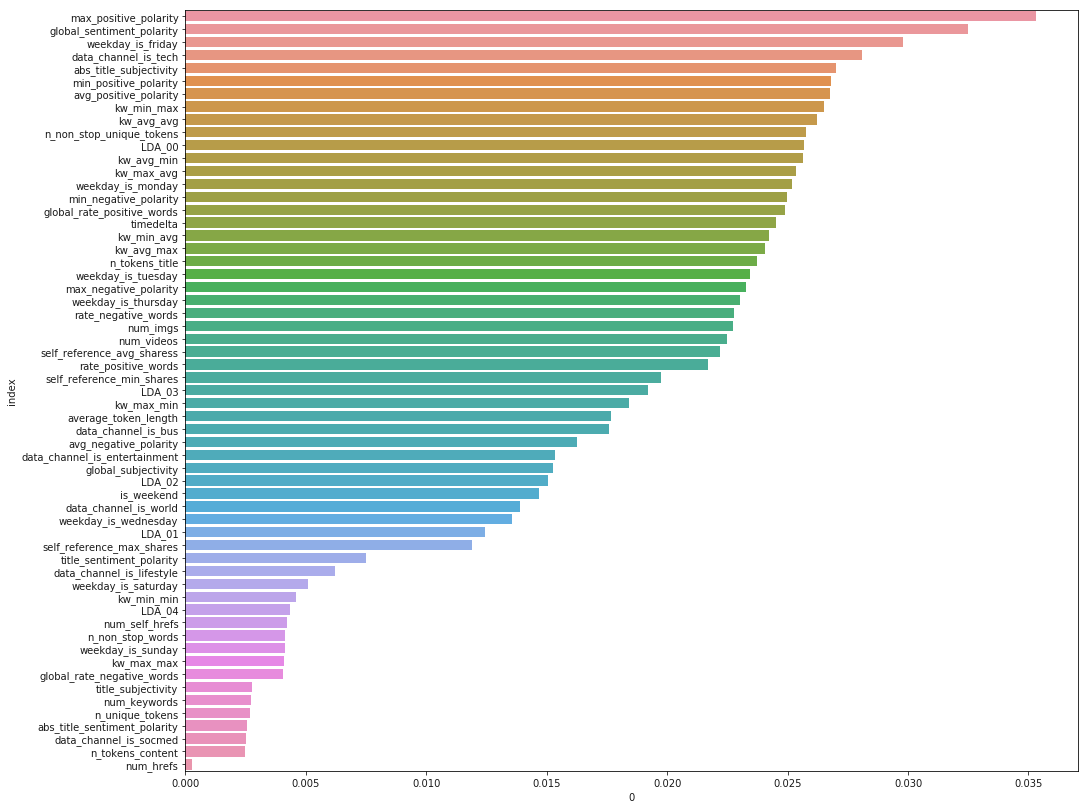

In [55]:
f, ax = plt.subplots(figsize=(16, 14))
sns.set_color_codes("pastel")
ax = sns.barplot( y='index', x= 0, data=df_nn.sort_values([0], ascending=[False]))

## 12. Evaluating the Final Model with the Test Set<a name="evaluate"></a>
Finally, using the test set we've kept aside, let's check how good the model is.

In [56]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_set)

final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3247.008213407702

Next, testing the model with actual data

In [57]:
some_X_data = X_test_set.iloc[:] #seems to be working also w-o .iloc!
some_y_data = y_test_set.iloc[:] #seems to be working also w-o .iloc!

Predicted_shares = list(final_model.predict(some_X_data)) 

Actual_shares = list(some_y_data)

final_data = [Predicted_shares, Actual_shares]

The 'final_data' consist now of the Predicted values for 'shares' the model creates, and the Actual values for 'shares' from our test set we've kept aside for this. In order to view it graphically, we create the needed dataframes. But first, we sort the data.

In [58]:
sorted(zip(Predicted_shares, Actual_shares), reverse=True);

And then look at the values side by side.

In [59]:
df_shares = pd.DataFrame(Predicted_shares, Actual_shares)   
df_shares.reset_index(level=0, inplace=True)
df_shares_AvsP = df_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_shares_AvsP.head()

,Actual shares,Predicted shares
0,2600,3217.6
1,870,2114.2
2,1200,1432.7
3,655,1851.3
4,4600,3942.8


This is what the result looks like plotting the Predicted shares against Actual shares:

C:\Users\huytr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


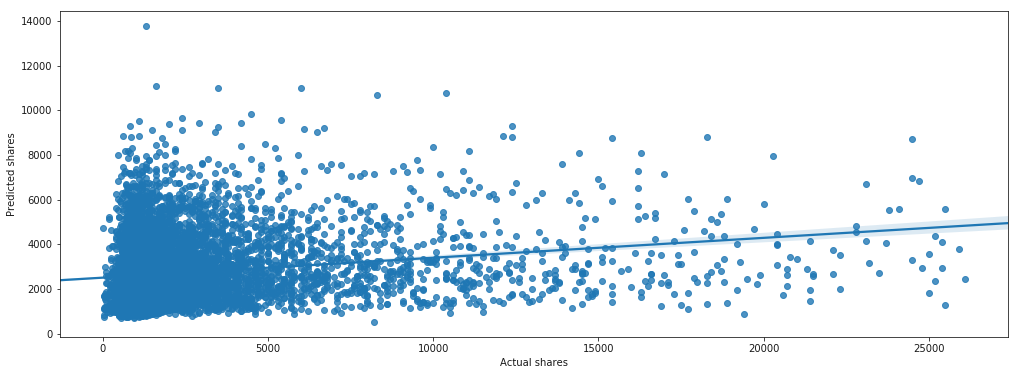

In [61]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_shares_AvsP["Actual shares"], y=df_shares_AvsP["Predicted shares"])

The results don't look too encouraging! There is a lot of  dispersion. Plotting them in a histogram gives a different perspective, but still shows Predictions from the model tend to be more evenly distributed, with a lower kurtosis.

C:\Users\huytr\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


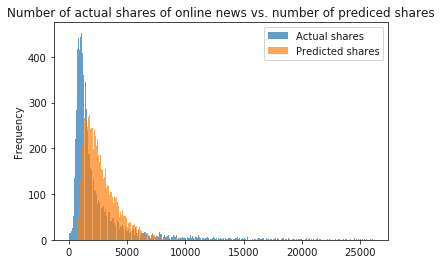

In [64]:
fig_size[0]=17.0
fig_size[1]=6.0

df_shares_AvsP.plot(bins=300, kind='hist', alpha=0.7)
plt.title('Number of actual shares of online news vs. number of prediced shares')
axes=plt.axes()
plt.show()

The outcome is further confirmed by the very low R2 score:

In [63]:
from sklearn.metrics import r2_score

r2_score( Actual_shares, Predicted_shares)

-0.03228961788524343

The model's prediction power is basically zero!

## 13. Conclusions<a name="conclusions"></a>

Clearly, there is a room for improvement here.<br><br>
There could be to simplify the model by reducing the number of features (i.e: 20-30 by removing less important ones).<br><br> 
Another one would be getting rid of outliers even further. Now outliers were defined as the number of 'shares' with  +/- 2 standard deviations around its mean. In practice observations where number of 'shares' was above 26647 were left out, which counted for only 1.5% of the data. <br><br>